# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city #might be cities?
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | papatowai
Processing Record 2 of Set 1 | stanley
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | east london
Processing Record 5 of Set 1 | espargos
City not found. Skipping...
Processing Record 6 of Set 1 | cherepovets
Processing Record 7 of Set 1 | tolanaro
Processing Record 8 of Set 1 | west island
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | suva
Processing Record 11 of Set 1 | ocean pointe
City not found. Skipping...
Processing Record 12 of Set 1 | port douglas
Processing Record 13 of Set 1 | cooper's town
Processing Record 14 of Set 1 | kupang
Processing Record 15 of Set 1 | vilyuchinsk
Processing Record 16 of Set 1 | san patricio
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | port mathurin
Processing Record 19 of Set 1 | paicandu
Processing Record 20 of Set 1 | iskateley
Processing Record 21 of Set 1 | smithers
P

Processing Record 40 of Set 4 | woodstock
Processing Record 41 of Set 4 | nepomuceno
Processing Record 42 of Set 4 | thompson
Processing Record 43 of Set 4 | imbituba
Processing Record 44 of Set 4 | pervomayskoye
Processing Record 45 of Set 4 | usinsk
Processing Record 46 of Set 4 | arkhangel'sk
Processing Record 47 of Set 4 | dunedin
Processing Record 48 of Set 4 | aripuana
Processing Record 49 of Set 4 | little cayman
City not found. Skipping...
Processing Record 0 of Set 5 | vingt cinq
City not found. Skipping...
Processing Record 1 of Set 5 | champerico
Processing Record 2 of Set 5 | aswan
Processing Record 3 of Set 5 | karmaskaly
Processing Record 4 of Set 5 | tazacorte
Processing Record 5 of Set 5 | brasilia de minas
Processing Record 6 of Set 5 | axim
Processing Record 7 of Set 5 | urengoy
Processing Record 8 of Set 5 | pisco
Processing Record 9 of Set 5 | mizdah
Processing Record 10 of Set 5 | kalabo
Processing Record 11 of Set 5 | kenai
Processing Record 12 of Set 5 | ixtapa
P

Processing Record 30 of Set 8 | port alberni
Processing Record 31 of Set 8 | tiruchchendur
Processing Record 32 of Set 8 | forest grove
Processing Record 33 of Set 8 | howard springs
Processing Record 34 of Set 8 | toga village
City not found. Skipping...
Processing Record 35 of Set 8 | nadym
Processing Record 36 of Set 8 | ngozi
Processing Record 37 of Set 8 | medicine hat
Processing Record 38 of Set 8 | akureyri
Processing Record 39 of Set 8 | praia da vitoria
Processing Record 40 of Set 8 | toliara
Processing Record 41 of Set 8 | katsuura
Processing Record 42 of Set 8 | dapa
Processing Record 43 of Set 8 | kingston
Processing Record 44 of Set 8 | port saint john's
Processing Record 45 of Set 8 | sao miguel do araguaia
Processing Record 46 of Set 8 | aban
Processing Record 47 of Set 8 | dongsheng
Processing Record 48 of Set 8 | zmeinogorsk
Processing Record 49 of Set 8 | fish town
Processing Record 0 of Set 9 | galveston
Processing Record 1 of Set 9 | lagoa
Processing Record 2 of Set

Processing Record 17 of Set 12 | glen innes
Processing Record 18 of Set 12 | bardai
Processing Record 19 of Set 12 | sambava
Processing Record 20 of Set 12 | safotu
Processing Record 21 of Set 12 | guane
Processing Record 22 of Set 12 | morondava
Processing Record 23 of Set 12 | puerto deseado
Processing Record 24 of Set 12 | olyokminsk
Processing Record 25 of Set 12 | aromashevo
Processing Record 26 of Set 12 | corn island
Processing Record 27 of Set 12 | tucumcari
Processing Record 28 of Set 12 | la plata
Processing Record 29 of Set 12 | ust'-kut
Processing Record 30 of Set 12 | mckinleyville
Processing Record 31 of Set 12 | gaiman
Processing Record 32 of Set 12 | la junta
Processing Record 33 of Set 12 | thunder bay
Processing Record 34 of Set 12 | chiras
Processing Record 35 of Set 12 | malabar
Processing Record 36 of Set 12 | lake havasu city
Processing Record 37 of Set 12 | onokhoy
Processing Record 38 of Set 12 | sandnessjoen
Processing Record 39 of Set 12 | faya-largeau
Process

In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [17]:
# Display sample data
city_data_df["Max Temp"] = city_data_df["Max Temp"] - 273.15
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,10.35,72,89,7.37,NZ,1682460457
1,stanley,54.8680,-1.6985,3.77,86,0,1.03,GB,1682460641
2,blackmans bay,-43.0167,147.3167,11.96,83,0,2.18,AU,1682460641
3,east london,-33.0153,27.9116,20.63,92,99,4.30,ZA,1682460641
4,cherepovets,59.1333,37.9000,8.87,70,81,1.64,RU,1682460642


In [18]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,10.35,72,89,7.37,NZ,1682460457
1,stanley,54.8680,-1.6985,3.77,86,0,1.03,GB,1682460641
2,blackmans bay,-43.0167,147.3167,11.96,83,0,2.18,AU,1682460641
3,east london,-33.0153,27.9116,20.63,92,99,4.30,ZA,1682460641
4,cherepovets,59.1333,37.9000,8.87,70,81,1.64,RU,1682460642


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

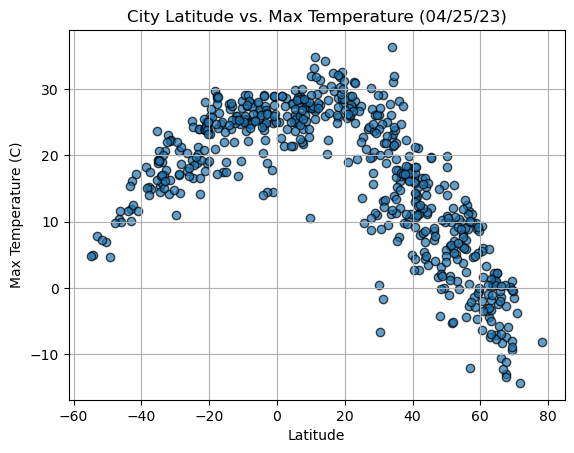

In [21]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],
           city_data_df["Max Temp"],
           edgecolor="black", linewidth=1, 
            marker="o", 
            alpha=0.7, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

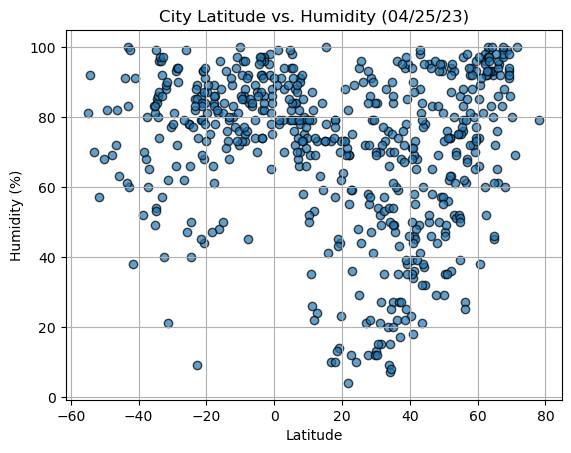

In [22]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.7, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

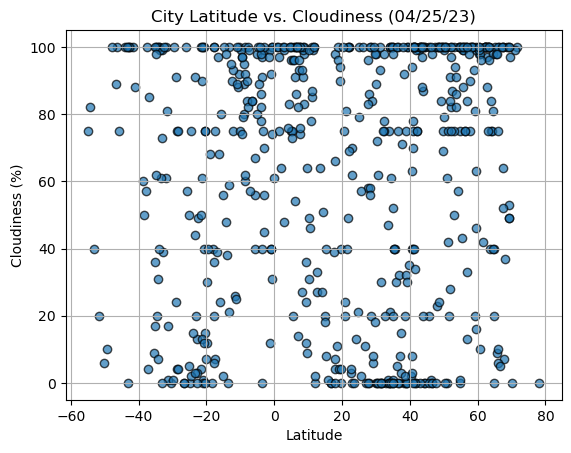

In [23]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.7, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

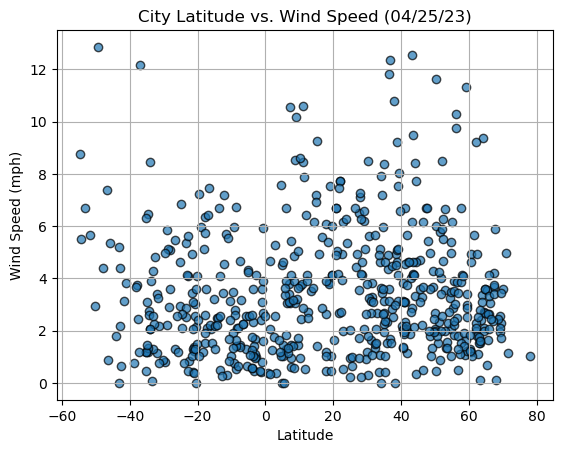

In [24]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.7, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
# Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
# Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()



In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,stanley,54.8680,-1.6985,3.77,86,0,1.03,GB,1682460641
4,cherepovets,59.1333,37.9000,8.87,70,81,1.64,RU,1682460642
7,tiksi,71.6872,128.8694,-14.29,100,100,1.13,RU,1682460643
10,cooper's town,26.8667,-77.5167,24.04,72,11,4.45,BS,1682460644
12,vilyuchinsk,52.9306,158.4028,5.15,80,50,3.56,RU,1682460644


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,10.35,72,89,7.37,NZ,1682460457
2,blackmans bay,-43.0167,147.3167,11.96,83,0,2.18,AU,1682460641
3,east london,-33.0153,27.9116,20.63,92,99,4.30,ZA,1682460641
5,tolanaro,-25.0319,46.9987,19.31,78,50,2.96,MG,1682460642
6,west island,-12.1568,96.8225,25.99,83,75,7.20,CC,1682460643


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8609275290202738


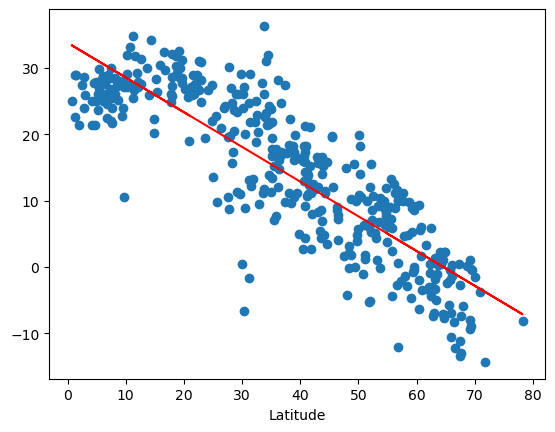

In [28]:
# Linear regression on Northern Hemisphere
#I received help on all the scatter plots and regression from my tutor. 
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,280))
plt.show()

The r-squared is: 0.7699813689566982


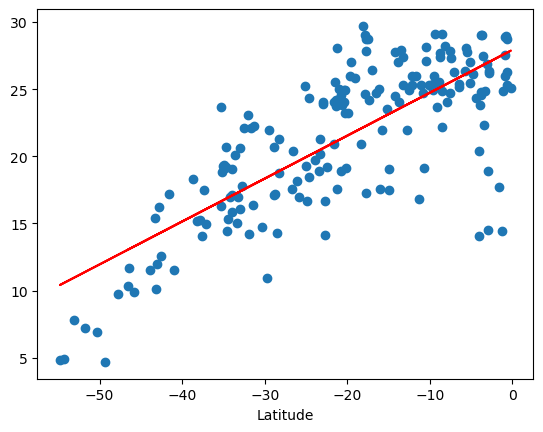

In [29]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,280))
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#Based on these linear regression plots above, for the northern hemisphere there is a very strong negative correlation between temperature and latitude.This means that for the northern hemisphere, the higher the latitude, the lower the average temperatures tend to be. For the southern hemisphere, there is a strong positive correlation between temperature and latitude. This means that the higher the latitude in the southern hemisphere, the higher the average temperatures tend to be. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.14574318064225225


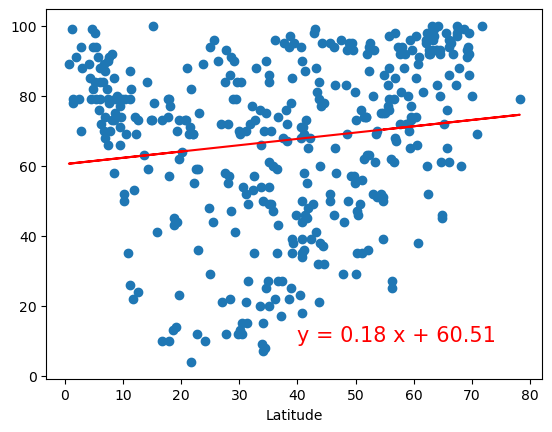

In [30]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))
plt.show()

The r-squared is: 0.23546208457791065


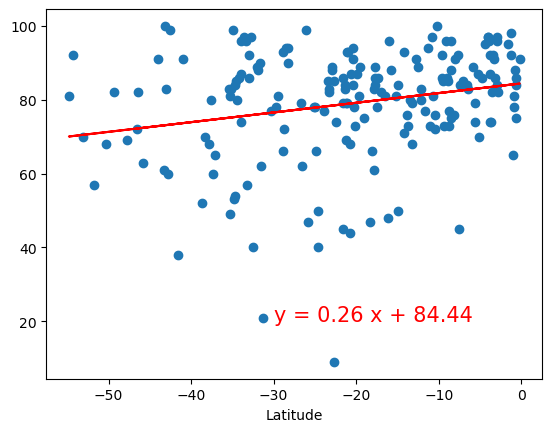

In [31]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,20))
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#For the regression plots above, we see that there is a very weak to no positive correlation between humidity and latitude in the nothern hemisphere. For the southern hemisphere, there is low positive correlation between the latitude and humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.09086306972082304


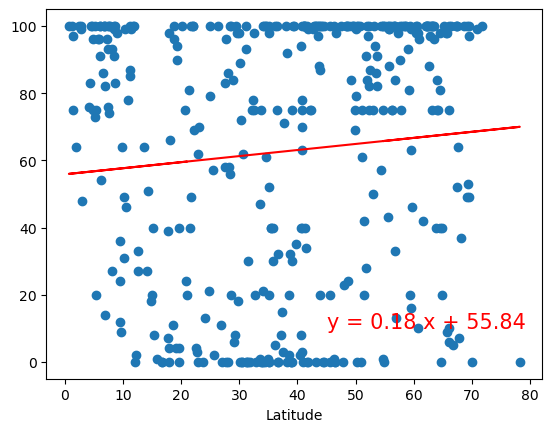

<function matplotlib.pyplot.show(close=None, block=None)>

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (45,10))
plt.show

The r-squared is: 0.14934698955070044


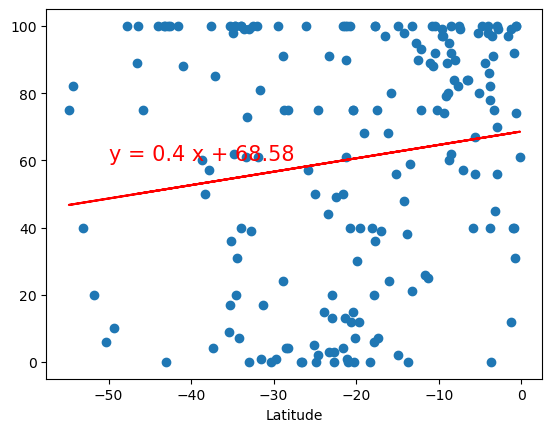

<function matplotlib.pyplot.show(close=None, block=None)>

In [33]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-50,60))
plt.show

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#For the above plots, we see that there is no or very very little positive correlation between latitude and cloudiness in both the nothern and southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.07386317807385973


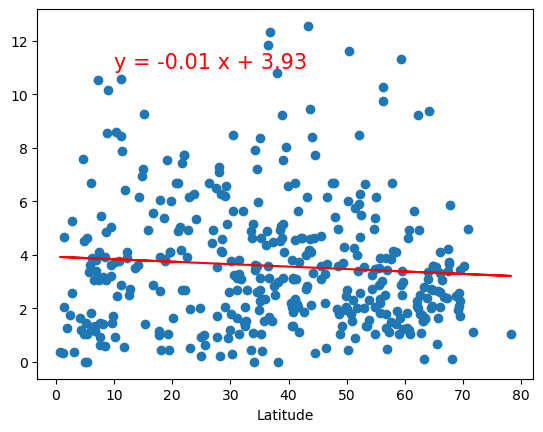

In [34]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (10,11))
plt.show()

The r-squared is: -0.2779149496008485


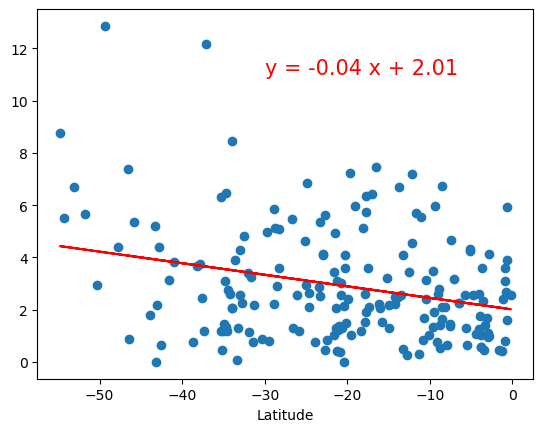

In [35]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (-30,11))
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# In the plots above, we see there is no or very little positive correlation between latitude and wind speed in the northern hemisphere. In the southern hemisphere, there is very little negative correlation between latitude and windspeed. 